## 1a. Entendimiento del negocio

![](./credit_card_fraud_detection.png)

From Kaggle: [Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data)

> This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions. -- From Kaggle's dataset page 

### Context

Tenemos un *dataset* anonimizado con transacciones de tarjetas de crédito realizadas en 2023. Algunas de estas transacciones han sido etiquetadas como fraudulentas. Una transacción se considera fraudulenta cuando ha sido realizada sin el consentimiento del dueño de la tarjeta, como ocurriría tras un robo.

### Objective

Desarrollar un modelo capaz de detectar las transacciones fraudulentas.

## 1b. Entendimiento de los datos

Para empezar, importamos las librerías que vamos a utilizar:

- Pandas: Pandas es una biblioteca esencial en la ciencia de datos que proporciona estructuras de datos flexibles y eficientes, como DataFrames, para el análisis y manipulación de datos tabulares. Es ampliamente utilizada para limpiar, transformar y analizar datos, lo que la convierte en una herramienta fundamental para la preparación de datos en proyectos de ciencia de datos.

- Scipy: Scipy es una biblioteca que se construye sobre NumPy y ofrece una amplia variedad de módulos y funciones especializadas para aplicaciones científicas y matemáticas. Incluye herramientas para estadísticas, optimización, álgebra lineal y procesamiento de señales, lo que la hace esencial en la investigación y el análisis de datos en ciencia de datos.

- Scikit-learn (sklearn): Es una biblioteca clave para el aprendizaje automático en Python, ofreciendo una amplia variedad de algoritmos y herramientas para clasificación, regresión y agrupamiento.

- Plotly Express: Plotly Express es una biblioteca de visualización de datos que simplifica la creación de gráficos interactivos y visuales. Es especialmente útil en la exploración de datos y la comunicación de resultados en ciencia de datos, permitiendo a los científicos de datos crear visualizaciones informativas y atractivas con facilidad.


In [1]:
# | code-fold: true

# Import libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
import time

# Import plotly and customize
import plotly.io as pio
import plotly.express as px

pio.templates.default = "plotly"
pio.templates["plotly"].layout.colorway = px.colors.qualitative.Set2

In [2]:
df = pd.read_csv("creditcard_2023.csv")

::: {.callout-note title="Matemáticas y código: en Inglés" collapse="true"}

Aunque el texto principal está en español, los términos matemáticos, los títulos de secciones y el código están en inglés.

Esta práctica sigue el estándar internacional y ayuda a familiarizarse con el lenguaje técnico más utilizado en el campo de la ciencia de datos.
:::

### 1b.1 Descripción de datos

El *dataset* consiste en **un archivo csv** con las siguientes columnas:
- id: Identificador único para cada transacción
- V1-V28: funciones anónimas que representan varios atributos de transacción (por ejemplo, hora, ubicación, etc.)
- Amount: El monto de la transacción
- Class: Etiqueta binaria que indica si la transacción es fraudulenta (1) o no (0)

No se nos aporta información de las unidades, más allá de *Amount*, que probablemente sean euros.

In [3]:
df.describe()

id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.952786e+00 -2.111111e+01 -4.351839e+00 -1.075634e+01 -3.751919e+00   
25%   -2.934955e-01 -4.458712e-01 -2.835329e-01 -1.922572e-01 -5.687446e-01   
50%    8.108788e-02  7.871758e-02  2.333659e-01 -1.145242e-01  9.252647e-02   
75%    4.397368e-01  4.977881e-01  5.259548e-01  4.729905e-02  5.592621e-01   
max    4.271689e+01  2.616840e+01  2.178730e+02  5.958040e+00  2.027006e+01   

       ...           V21           V22           V23           V24  \
count  ...  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   ...  4.758361e-17  3.948640e-18  6.194741e-18 -2.799036e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -1.938252e+01 -7.734798e+00 -3.029545e+01 -4.067968e+00   
25%    ... -1.664408e-01 -4.904892e-01 -2.376289e-01 -6.515801e-01   
50%    ... -3.743065e-02 -2.732881e-02 -5.968903e-02  1.590123e-02   
75%    ...  1.479787e-01  4.638817e-01  1.557153e-01  7.007374e-01   
max    ...  8.087080e+00  1.263251e+01  3.170763e+01  1.296564e+01   

                V25           V26           V27           V28         Amount  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000   
mean  -3.178905e-17 -7.497417e-18 -3.598760e-17  2.609101e-17   12041.957635   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00    6919.644449   
min   -1.361263e+01 -8.226969e+00 -1.049863e+01 -3.903524e+01      50.010000   
25%   -5.541485e-01 -6.318948e-01 -3.049607e-01 -2.318783e-01    6054.892500   
50%   -8.193162e-03 -1.189208e-02 -1.729111e-01 -1.392973e-02   12030.150000   
75%    5.500147e-01  6.728879e-01  3.340230e-01  4.095903e-01   18036.330000   
max    1.462151e+01  5.623285e+00  1.132311e+02  7.725594e+01   24039.930000   

          Class  
count  568630.0  
mean        0.5  
std         0.5  
min         0.0  
25%         0.0  
50%         0.5  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

Todas las columnas anónimas tienen una *standard deviation* de 1 y una *mean* centrada 0. Esto nos indica que han sido normalizadas.

In [4]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Existe el mismo número de muestras para cada clase.

### Ideas destacadas
- Las variables independientes han sido, como mínimo, normalizadas. 
- Existe el exactamente el mismo número de muestras para cada clase. Es un *dataset* perfectamente balanceado.

Podemos estar ante un *dataset* generado, en lugar de obtenido del mundo real. ¿Por qué?
- Es muy difícil acceder a un *dataset* con más de 2500000 muestras donde realmente se haya identificado una transacción fraudulenta. 
- La falta de información especifica sobre la procedencia de los datos.

Esto es no es un problema. Generar datos es una opción válida (y a veces la única), existen ciertos escenarios donde la recolección de datos reales conlleva manejar datos sensibles.
El único inconveniente estaría que el dataset se ha publicado como: "Transacciones con tarjeta de crédito realizadas por titulares de tarjetas europeos en el año 2023.". Es decir, se da ha entender que se tratan de datos reales (en los que se ha anonimizado la información sensible).

## 2a. Preparación de los datos

### 2a.1 Typecasting

Comprobamos el tipo de datos de las columnas y los modificamos conforme nuestra descripción inicial.

In [5]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
categorical_columns = ["Class"]
df[categorical_columns] = df[categorical_columns].astype("category")

### 2a.2 Manejo de duplicados

Comprobamos si existen duplicados

In [7]:
df.duplicated().sum()

0

### 2a.3 Análisis de valores atípicos

In [8]:
for column in df.columns[df.columns.str.startswith("V")]:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"{column}: {len(outliers)} outliers")

V1: 30 outliers
V2: 43620 outliers
V3: 4300 outliers
V4: 2766 outliers
V5: 71015 outliers
V6: 48854 outliers
V7: 55997 outliers
V8: 93856 outliers
V9: 18939 outliers
V10: 10710 outliers


V11: 709 outliers
V12: 700 outliers
V13: 4197 outliers
V14: 1088 outliers
V15: 6780 outliers
V16: 4546 outliers
V17: 14890 outliers
V18: 16676 outliers
V19: 19519 outliers
V20: 65708 outliers
V21: 57138 outliers


V22: 13706 outliers
V23: 72056 outliers
V24: 2029 outliers
V25: 28089 outliers
V26: 6554 outliers
V27: 82235 outliers
V28: 70242 outliers


In [9]:
box_plot = px.box(
    df, y="Amount", color="Class", title="Box Plot of Transaction Amounts"
)
box_plot.for_each_trace(
    lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
)

box_plot.show()

#### Ideas destacadas

Para las variables anónimas, hemos localizado gran cantidad de *outliers*, como cabría esperar.
Se pueden hacer tres cosas con los *outliers*, siguiendo la mnemotecnia **3R: rectificar, retener o remover**.
En este caso, podemos estar ante valores atípicos genuinos, por tanto vamos a retenerlos.

En cuanto a la variable "Amount", no existen outliers. Además hay una simetría perfecta entre ambas clases, lo que parece confirmar nuestra suposición previa sobre que estamos trabajando con datos generados.


### 2a.4 Variables con varianza cercana a cero


No existen variables con *Zero & Near Zero Variance*

### 2a.5 Valores ausentes o faltantes

In [10]:
df.isnull().sum().sum()

0

No existen *Missing Values*.

## 2b. Análisis exploratorio de datos

Exploremos la correlación entre variables.

<Axes: >

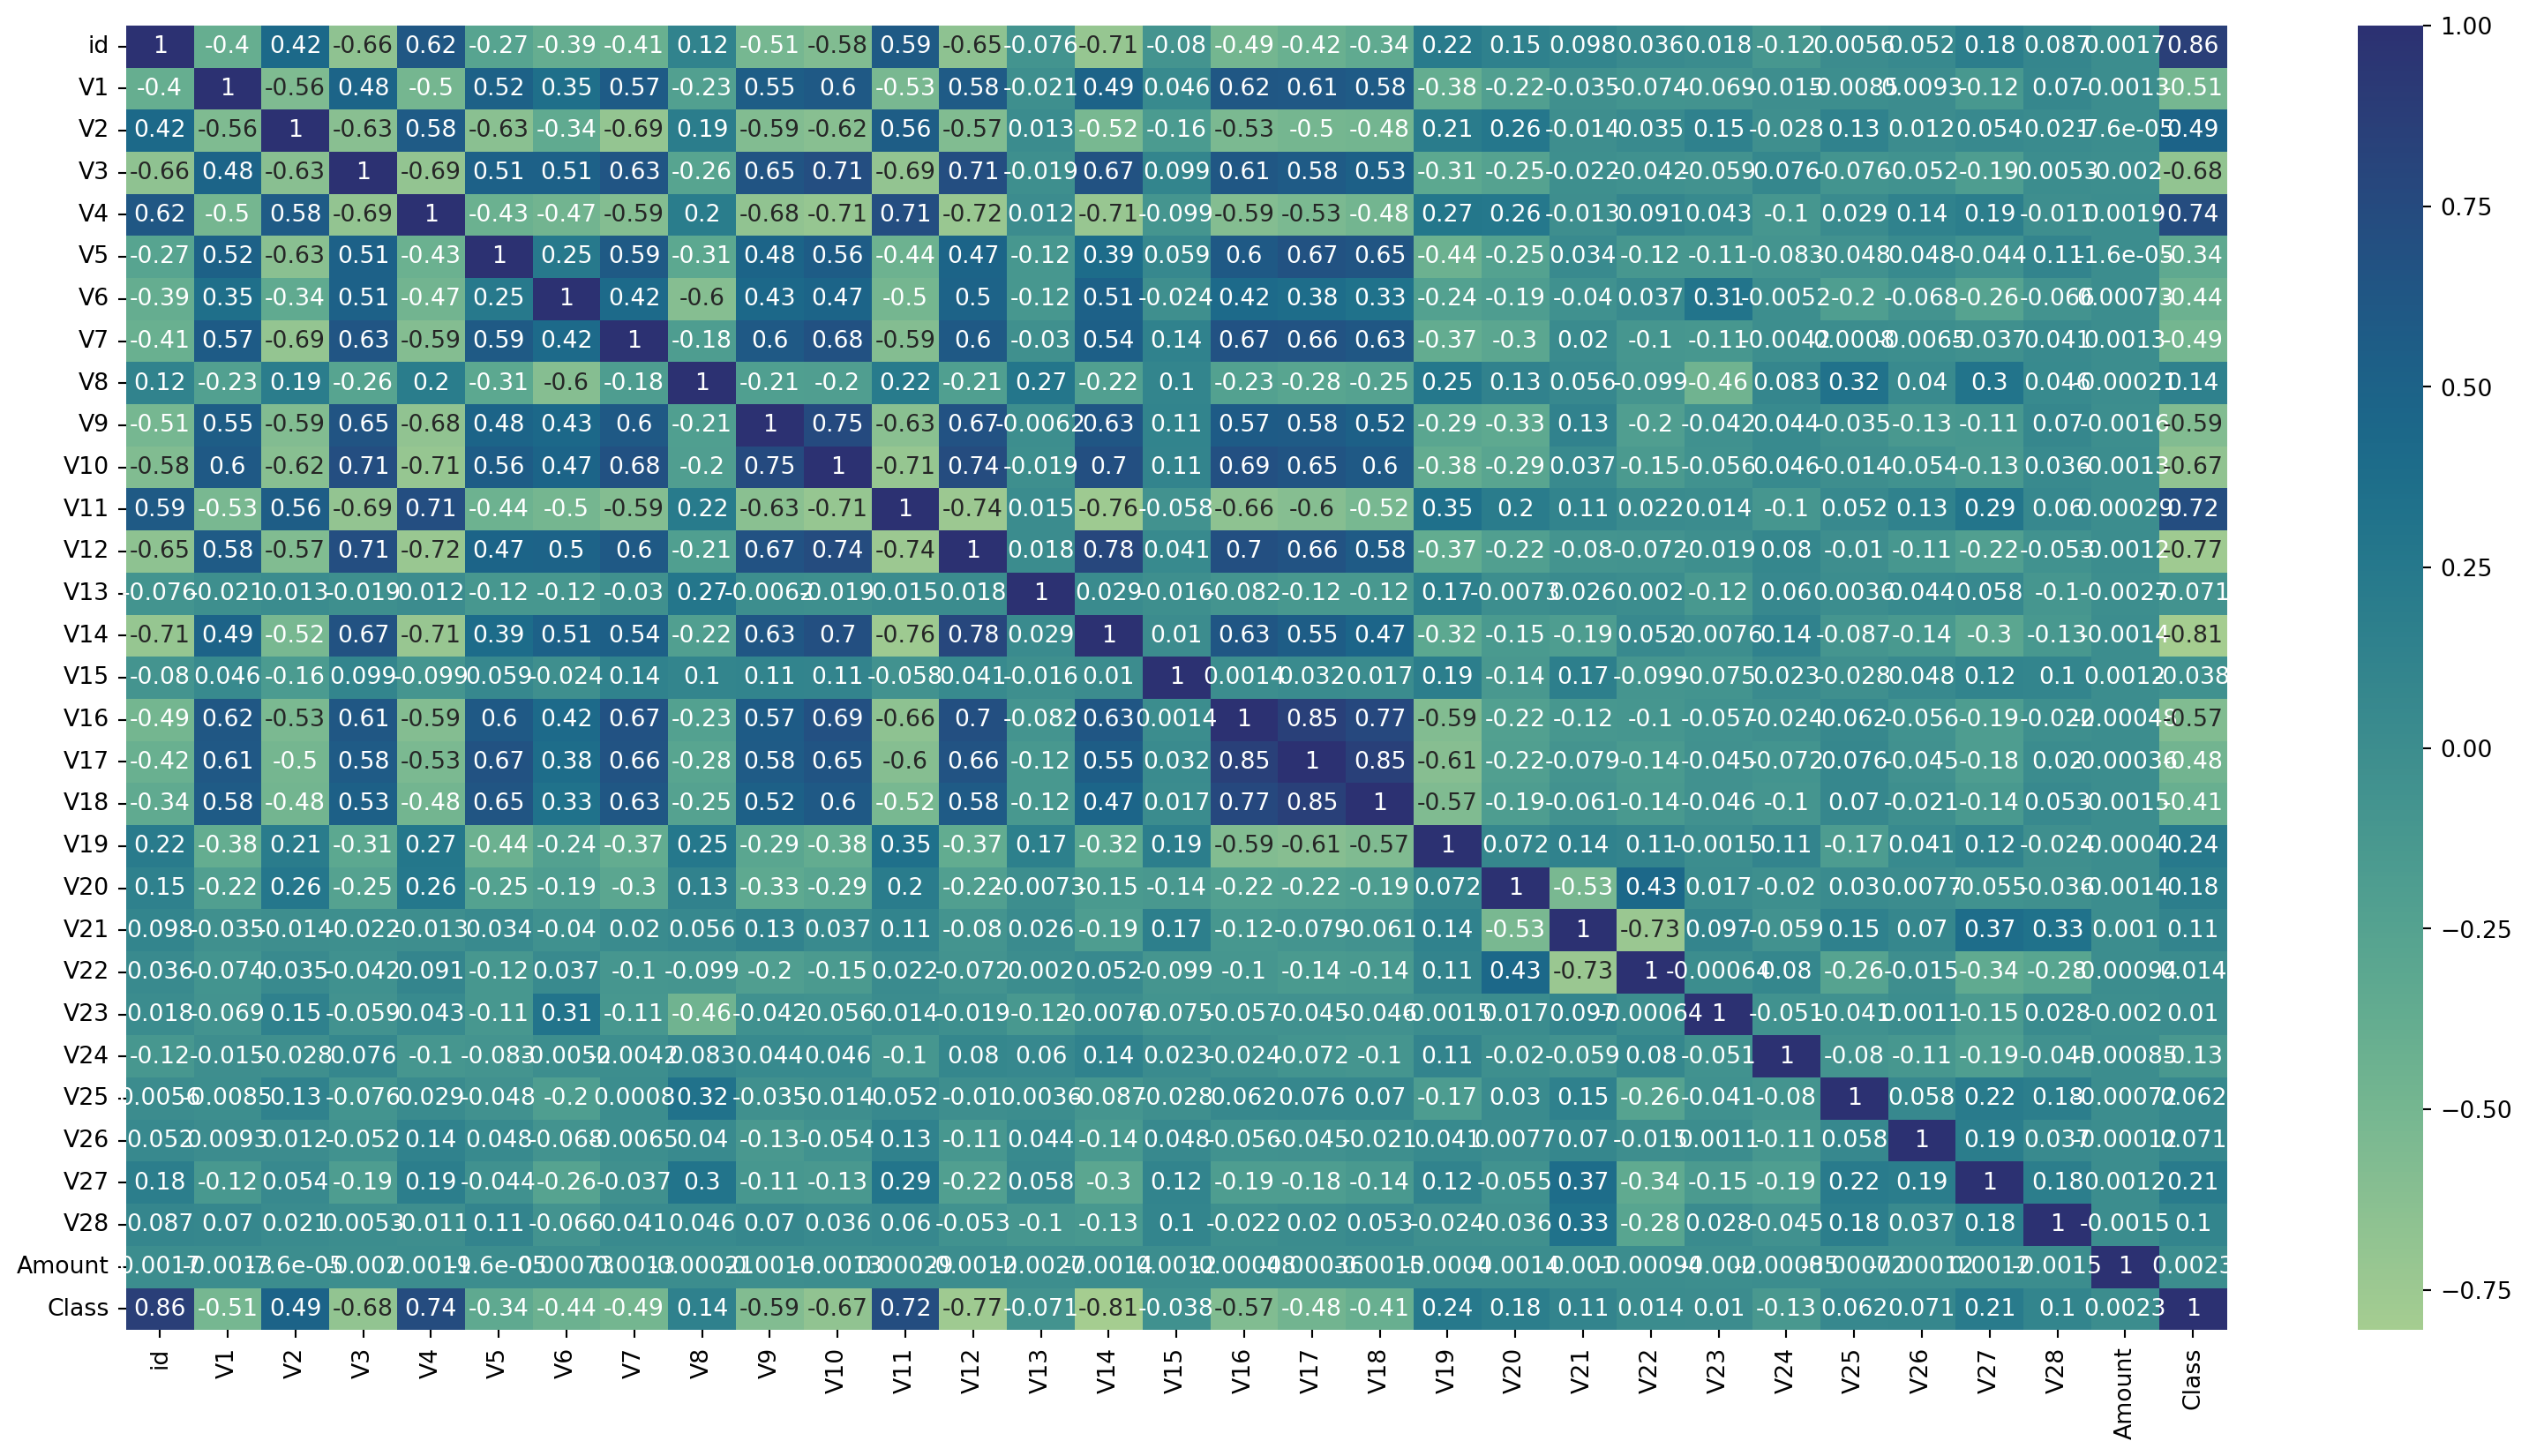

In [11]:
figure = plt.figure(figsize=[20, 10])
sns.heatmap(df.corr(), cmap="crest", annot=True)

- Correlaciones con "Class": algunas variables 'V' muestran correlaciones moderadas con la variable 'Class', que representa si una transacción es fraudulenta o no. Estas variables pueden ser muy importantes para predecir el fraude.

- La variable 'Amount: no muestra correlaciones fuertes con la mayoría de las otras variables, lo que sugiere que el monto de las transacciones no está directamente relacionado con las otras características en términos de correlación lineal.

- Correlaciones fuertes: se observan algunas correlaciones fuertes entre las variables 'V'. Esto puede indicar relaciones subyacentes significativas que podrían ser exploradas para comprender mejor la estructura de los datos.

- Dado que algunas variables están altamente correlacionadas, podrían ser candidatas para técnicas de reducción de dimensiones como PCA, para simplificar el modelo sin perder información valiosa.


Representemos las variables con más correlación con la variable objetivo "Class":

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select correlations with 'Class' variable excluding 'Class' itself and 'ID'
class_correlations = correlation_matrix["Class"].drop(["Class", "id"])

# Sort the variables by their absolute correlation with 'Class'
sorted_correlations = class_correlations.abs().sort_values(ascending=False)

In [13]:
sorted_correlations.head(7)

V14    0.805669
V12    0.768579
V4     0.735981
V11    0.724278
V3     0.682095
V10    0.673665
V9     0.585522
Name: Class, dtype: float64

In [14]:
# Select the variables with the highest correlation
selected_variables = sorted_correlations.head(4).index.tolist()

print(f"selected_variables = {selected_variables}")

# A stratified sample is created for the charts
sample_df, _ = train_test_split(df, train_size=1000, stratify=df["Class"])

selected_variables = ['V14', 'V12', 'V4', 'V11']


In [15]:
def generate_violin_plots(data, variables):
    for variable in variables:
        fig = px.violin(
            data,
            x=variable,
            color="Class",
            box=True,
            points="outliers",
            title=f"Violin Plot for {variable}",
        )

        fig.for_each_trace(
            lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
        )
        fig.show()


generate_violin_plots(sample_df, selected_variables)

In [16]:
# Create the scatter matrix
fig = px.scatter_matrix(
    sample_df,
    dimensions=selected_variables,
    color="Class",
    title="Scatter Matrix of Selected Variables",
)

fig.for_each_trace(
    lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
)
fig.show()

### Ideas destacadas

Con las 28 variables anónimas, un estudio detallado de centralidad, dispersión, *skewness* y *kurtosis* no parece lo más adecuado. Recapitulando:
- Algunas variables 'V' tienen correlaciones moderadas con la variable 'Class', lo que es importante para predecir el fraude.
- Se observan correlaciones fuertes entre algunas variables 'V', lo que sugiere relaciones significativas. Podemos considerar la reducción de dimensionalidad.
- La variable 'Amount' no tiene correlaciones fuertes con otras variables.

## 2c. Ingeniería de características

Vamos a construir varios conjuntos de datos y evaluaremos el rendimiento de los modelos. Utilizaremos 4 conjuntos:
- El conjunto original
- Un conjunto *Threshold-Based*
- Dos conjuntos *PCA*

Los creamos a continuación:

### 2c.1 Feature Selection

Creamos el conjunto *Threshold-Base* seleccionando las  variables cuyo valor absoluto en la correlación con "Class" sea mayor a 0.6


In [17]:
correlation_df = df[
    sorted_correlations[sorted_correlations > 0.6].index.tolist() + ["Class"]
]

In [18]:
correlation_df

V14       V12        V4       V11        V3       V10 Class
0       0.549020  0.293438 -0.083724 -0.987020  2.496266  0.637735     0
1       0.627719  1.564246 -0.429654  0.140107  0.558056  0.529808     0
2       0.616874  0.659201 -0.457986 -0.272985  1.728538  0.690708     0
3       0.559535  0.737483 -1.090178 -0.752581  1.746840  0.575231     0
4       0.241454  1.029577 -0.448293 -1.203171  1.527053  0.968046     0
...          ...       ...       ...       ...       ...       ...   ...
568625 -1.363454 -1.330500  0.904227  1.430971 -0.899794 -1.161847     1
568626 -0.812043 -0.539948 -0.267328  0.173590 -0.068129 -0.210817     1
568627 -0.395126 -0.461849 -0.035893  0.477582  0.137526 -0.144495     1
568628 -0.390369  0.335215 -0.144480 -0.324934 -0.300889 -0.080078     1
568629 -1.062488 -1.153011  0.374732  0.892136 -0.649140 -0.513556     1

[568630 rows x 7 columns]

### 2c.2 Feature Extraction

Realizamos *Principal Component Analysis*. Creamos dos nuevos conjuntos de datos.

In [19]:
# Select the features to be analyzed, which are columns "V1" to "V28"
features = [f"V{i}" for i in range(1, 29)]

# Extract the selected features from the DataFrame 'df'
x = df.loc[:, features].values

# Perform Principal Component Analysis (PCA) with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a new DataFrame to store the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=["pc1", "pc2"])

# Concatenate the principal components with the 'Class' column
pca_2_df = pd.concat([principalDf, df[["Class"]]], axis=1)

In [20]:
# Create a stratified sample with 1000 data points for visualization
sample_df, _ = train_test_split(pca_2_df, train_size=1000, stratify=df["Class"])

# Create a scatter plot using Plotly Express to visualize the principal components
fig = px.scatter(sample_df, x="pc1", y="pc2", color="Class")

# Update the legend names for clarity
fig.for_each_trace(
    lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
)
fig.show()

In [21]:
# Perform Principal Component Analysis (PCA) with 6 components
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

# Create a new DataFrame to store the principal components
principalDf = pd.DataFrame(
    data=principalComponents, columns=[f"pc{i}" for i in range(1, 7)]
)

# Concatenate the principal components with the 'Class' column
pca_6_df = pd.concat([principalDf, df[["Class"]]], axis=1)

In [22]:
# Create a stratified sample with 1000 data points for visualization
sample_df, _ = train_test_split(pca_6_df, train_size=1000, stratify=df["Class"])

# Create the scatter matrix
fig = px.scatter_matrix(
    sample_df,
    dimensions=[f"pc{i}" for i in range(1, 7)],
    color="Class",
    title="Scatter Matrix of Selected Variables",
)

fig.for_each_trace(
    lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
)
fig.show()

In [23]:
original_df = df.drop(columns=["id"])

# Assign the scaled values back to the "Amount" column in the original DataFrame
amount_df = original_df[["Amount"]]
sc = StandardScaler()
scaled_amount = sc.fit_transform(amount_df)
original_df["Amount"] = scaled_amount

### Ideas destacadas

Vamos a comparar el rendimiento que podemos obtener con los siguientes *datasets*:
- `correlation_df`, con las seis variables que tienen una correlación mayor a 0.6
- `pca_2_df`, con dos componentes principales de PCA
- `pca_6_df`, con seis componentes principales de PCA
- `original_df`, el conjunto original (con 29 variables)

## 3. Modelos

Empecemos con los siguientes modelos de aprendizaje automático superficial: 
- *Logistic Regression*
- *Decision Tree*
- *K-Nearest Neighbors*
- *Naive Bayes*

### 3.1 Modelos de aprendizaje automático superficial (Shallow Machine Learning Models)

In [24]:
# | code-fold: true

# Define a dictionary of datasets, including correlation_df, pca_2_df, pca_6_df, and original_df
datasets = {
    "correlation_df": correlation_df,
    "pca_2_df": pca_2_df,
    "pca_6_df": pca_6_df,
    "original_df": original_df,
}

# Define a dictionary of machine learning models, including Logistic Regression and Decision Tree
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

# Set the number of folds for cross-validation
k = 3

# Initialize an empty list to store the results
results = []

# Loop through each dataset and model combination
for dataset_name, dataset in datasets.items():
    # Separate the features (X) and the target variable (y)
    X = dataset.drop("Class", axis=1)
    y = dataset["Class"]

    for model_name, model in models.items():
        # Perform cross-validation and calculate various evaluation metrics
        scores = cross_validate(
            model,
            X,
            y,
            cv=k,
            scoring=["accuracy", "precision", "recall", "f1"],
            return_train_score=False,
            n_jobs=-1,
        )

        # Append the results to the list, rounding metrics to 3 decimal places
        results.append(
            {
                "Dataset": dataset_name,
                "Model": model_name,
                "CV Accuracy": round(scores["test_accuracy"].mean(), 3),
                "CV Precision": round(scores["test_precision"].mean(), 3),
                "CV Recall": round(scores["test_recall"].mean(), 3),
                "CV F1 Score": round(scores["test_f1"].mean(), 3),
            }
        )


# Create a DataFrame to store the results
results_shallow_models_df = pd.DataFrame(results)

In [25]:
# Create a bar plot to visualize the results, grouped by dataset and model
fig = px.bar(
    results_shallow_models_df,
    x="Dataset",
    y=["CV Accuracy", "CV Precision", "CV Recall", "CV F1 Score"],
    barmode="group",
    facet_col="Model",
)

# Configura el rango del eje y entre 0.8 y 1
fig.update_yaxes(range=[0.8, 1])

fig.show()

::: {.callout-important title="Fíjate que las gráficas se presentan con ZOOM en el eje Y"}

El valor más bajo de *accuracy*, que estamos viendo en las gráficas, está por encima del 90%
:::

### 3.2 Random Forest with Hypertuning and Principal Component Analysis (PCA) with 3 components

Los resultados obtenidos con el *dataset* *pca_2_df* son muy buenos. Tenemos que recordar que en este conjunto de datos solo tenemos dos columnas.

Vamos a crear un *dataset* pero con 3 PCA y entrenar un *Random Forest* con selección de hiperparámetros.

In [26]:
# Perform Principal Component Analysis (PCA) with 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# Create a new DataFrame to store the principal components
principalDf = pd.DataFrame(
    data=principalComponents, columns=[f"pc{i}" for i in range(1, 4)]
)

# Concatenate the principal components with the 'Class' column
pca_3_df = pd.concat([principalDf, df[["Class"]]], axis=1)

In [27]:
pca_3_df.head()

pc1       pc2       pc3 Class
0  2.190822 -0.165007  0.261912     0
1  2.085009  0.355936  0.170007     0
2  2.282787 -0.521482 -0.370453     0
3  2.694659  0.108025 -0.259090     0
4  2.048979 -0.354901  0.933317     0

Al trabajar con 3 dimensiones (variables) es muy interesante crear una representación gráfica interactiva.

In [28]:
# Create a stratified sample with 5000 data points for visualization
sample_df, _ = train_test_split(pca_3_df, train_size=5000, stratify=df["Class"])

fig = px.scatter_3d(
    sample_df,
    x="pc1",
    y="pc2",
    z="pc3",
    color="Class",
    color_discrete_map={0: "blue", 1: "red"},
    labels={"Class": "Transaction Type"},
    title="3D PCA Scatter Plot",
)

# Update the legend names for clarity
fig.for_each_trace(
    lambda t: t.update(name="Fraudulent" if t.name == "1" else "Legitimate")
)


fig.show()

::: {.callout-tip title="La gráfica es interactiva"}

Puedes rotarla libremente en cualquier eje para entender mejor los datos.
:::

In [29]:
# | code-fold: true

# Parameters for GridSearchCV
param_grid = {
    "n_estimators": [200, 500],  # Number of trees in the forest
    "max_depth": [20],  # Maximum depth of the tree
    "bootstrap": [True, False],  # Method for sample selection when training trees
    "criterion": ["gini"],  # Function to measure the quality of a split
}

# Separate features (X) and target variable (y)
X = pca_3_df.drop("Class", axis=1)
y = pca_3_df["Class"]

start_time = time.time()
print("Starting hyperparameter search for Random Forest...")

# Create and fit GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",  # Select evaluation metric
    n_jobs=-1,  # Use all available processors
    verbose=2,
)
rf_grid.fit(X, y)

# Elapsed time
elapsed_time = time.time() - start_time
minutes, seconds = divmod(elapsed_time, 60)
print(
    f"Hyperparameter search completed in: {int(minutes)} minutes {int(seconds)} seconds"
)

# Get the best model
best_random_forest = rf_grid.best_estimator_

# Calculate metrics for the best model
y_pred = best_random_forest.predict(X)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Save the results
results = {
    "Best Parameters": rf_grid.best_params_,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}

Starting hyperparameter search for Random Forest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=500; total time= 5.8min


/home/mike/.anaconda3/envs/data_road/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=200; total time= 2.3min
[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=500; total time= 5.6min


[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=200; total time= 3.3min


[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=200; total time= 2.3min
[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=500; total time= 5.7min
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=500; total time= 7.4min


[CV] END bootstrap=True, criterion=gini, max_depth=20, n_estimators=200; total time= 2.5min
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=200; total time= 3.2min
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=200; total time= 3.2min
[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=500; total time= 7.3min


[CV] END bootstrap=False, criterion=gini, max_depth=20, n_estimators=500; total time= 7.2min


Hyperparameter search completed in: 20 minutes 27 seconds


In [30]:
# Display the results
for metric, value in results.items():
    if metric != "Best Parameters":
        print(f"{metric}: {value:.3f}")
    else:
        print(f"{metric}: {value}")

# Convert the results into a DataFrame for tabular representation
results_random_forest_df = pd.DataFrame([results])

Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.990
Precision: 1.000
Recall: 0.981
F1 Score: 0.990


### Ideas destacadas

Los **modelos** que mejor funcionan son:
- *Decision Tree*
- *K-Nearest Neighbors* 

Lo más interesante nos lo muestran los ***datasets***. Recordemos que variables contiene cada uno:
- `correlation_df`, con las seis variables que tienen una correlación mayor a 0.6
- `pca_2_df`, con dos componentes principales de PCA
- `pca_6_df`, con seis componentes principales de PCA
- `original_df`, el conjunto original (con 29 variables)

Qué hemos descubierto:
- Pese a contar con 23 dimensiones menos, tanto `correlation_df` como `pca_6_df` logran unos resultados similares al *dataset original*. Eso significa que mediante las técnicas de reducción de dimensionalidad han funcionado correctamente logrando mantener la información relevante.
- Los resultados obtenidos con `pca_2_df` son muy buenos para haberlos obtenido mediante 2 dimensiones.


Por último, hemos creado un *dataset* con 3 PCA y entrenado un modelo ***Random Forest*** (con selección de hiperparámetros). Este enfoque es el que mejor resultado nos ha entregado. Vamos a explorarlo a continuación.

## 4. Evaluación

### 4.1 Medidas de precisión del modelo

Comparemos la curva ROC de algunos de los modelos

In [31]:
# | code-fold: true

# Optimal parameters obtained from hyperparameter search
best_params = {
    "bootstrap": False,
    "criterion": "gini",
    "max_depth": 20,
    "n_estimators": 500,
}

# Separate features (X) and the target variable (y)
X = pca_3_df.drop("Class", axis=1)
y = pca_3_df["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Make predictions
y_pred_best = best_random_forest.predict(X_test)
y_pred_proba_best = best_random_forest.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

# Calculate the ROC curve and AUC
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

In [32]:
# Display the confusion matrix and classification report
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}\n")

# Save the results in a DataFrame for tabular representation
results = {
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1],
    "ROC AUC": [roc_auc_best],
}
results_random_forest_df = pd.DataFrame(results)

Confusion Matrix:
[[84315   834]
 [ 3342 82098]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85149
           1       0.99      0.96      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589




In [33]:
# | code-fold: true

# LogisticRegression model with default parameters
default_lg = LogisticRegression()
default_lg.fit(X_train, y_train)

y_pred_proba_logistic = default_lg.predict_proba(X_test)[:, 1]

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

In [34]:
# | code-fold: true

# DecisionTree model with default parameters
default_gnb = GaussianNB()
default_gnb.fit(X_train, y_train)

y_pred_proba_gaussian_nb = default_gnb.predict_proba(X_test)[:, 1]

fpr_gaussian_nb, tpr_gaussian_nb, _ = roc_curve(y_test, y_pred_proba_gaussian_nb)
roc_auc_gaussian_nb = auc(fpr_gaussian_nb, tpr_gaussian_nb)

In [35]:
# Create a DataFrame for each model
df_rf = pd.DataFrame(
    {
        "False Positive Rate": fpr_best,
        "True Positive Rate": tpr_best,
        "Model": "Random Forest (area = %0.2f)" % roc_auc_best,
    }
)
df_logistic = pd.DataFrame(
    {
        "False Positive Rate": fpr_logistic,
        "True Positive Rate": tpr_logistic,
        "Model": "Logistic Regression Classifier (area = %0.2f)" % roc_auc_logistic,
    }
)
df_tree = pd.DataFrame(
    {
        "False Positive Rate": fpr_gaussian_nb,
        "True Positive Rate": tpr_gaussian_nb,
        "Model": "Gaussian Naive Bayes (area = %0.2f)" % roc_auc_gaussian_nb,
    }
)
df_random = pd.DataFrame(
    {
        "False Positive Rate": [0, 1],
        "True Positive Rate": [0, 1],
        "Model": "Random Classifier (area = 0.5)",
    }
)

# Concatenate the DataFrames
df = pd.concat([df_rf, df_logistic, df_tree, df_random])

# Create a line chart with Plotly Express
fig = px.line(
    df,
    x="False Positive Rate",
    y="True Positive Rate",
    color="Model",
    title="ROC Curve Comparison",
    markers=True,
)

# Add additional details to the chart
fig.update_layout(
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    legend_title="Model",
    showlegend=True,
)

# Show the chart
fig.show()

## 5. Recapitulación y reflexiones

### 5.1 Sobre los datos

Hemos descubierto que, aunque no se anuncia como tal, estamos trabajando con un conjunto de datos que ha sido generado (no recolectado). Esto no es un problema. Generar datos es una opción válida (y a veces la única); existen ciertos escenarios donde la recolección de datos reales conlleva manejar datos sensibles.
El único inconveniente estaría en que el *dataset* se ha publicado como: "Transacciones con tarjeta de crédito realizadas por titulares de tarjetas europeos en el año 2023". Es decir, se da a entender que se tratan de datos reales (en los que se ha anonimizado la información sensible).

Hemos descubierto que varias de las variables mantienen una relación lineal. También que la variable "Amount" aporta poca información sobre el tipo de transacción (cosa que sería poco habitual si estuviésemos trabajando con un *dataset* real).

### 5.2 Sobre el rendimiento de los modelos

Hemos creado nuevos *datasets* reduciendo la dimensionalidad del original. Estos nuevos *datasets* se han construido seleccionando las seis componentes principales de PCA o las seis variables que tienen una correlación mayor a 0.6. La ejecución de los modelos sobre estos conjuntos de datos ha mostrado un rendimiento similar al obtenido al utilizar las 29 dimensiones del conjunto original.

El *dataset* creado únicamente con dos componentes principales de PCA ha arrojado unos resultados sorprendentes. Por ello, hemos creado un *dataset* con 3 PCA y entrenado un modelo *Random Forest* (con selección de hiperparámetros). Este enfoque es el que mejor resultado nos ha entregado, con un accuracy en torno al 99% y una superficie bajo la curva ROC cercana al 0.99.

De todos modos, cabe señalar que modelos más sencillos como *Logistic Regression* han logrado resultados muy competitivos con una complejidad inferior a *Random Forest* (con selección de hiperparámetros).